In [94]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import seaborn as sns

In [95]:
#copying flipkart mobile search URL
URL = "https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_4_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_4_0_na_na_na&as-pos=4&as-type=TRENDING&suggestionId=mobiles&requestId=4b6aa497-843f-4dc8-b54e-7f69fb37af01&page=1"

In [96]:
#defining user agent and language
Headers = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36','Accept-Language' : 'en-US, en;q = 0.5'})
webpage = requests.get(URL,headers = Headers) #getting https request

In [97]:
webpage #response is 200 so html can be extracted

<Response [200]>

In [98]:
soup = BeautifulSoup(webpage.content,'html.parser') #converting webpage html source into structured format

In [99]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.ccbde3.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel

In [100]:
pages_link = soup.find_all('a',{'class' : 'ge-49M'}) #extracing anchor tag which contains 10 pages link at bottom of webpage

In [101]:
pages_link

[<a class="ge-49M _2Kfbh8" href="/search?q=mobiles&amp;as=on&amp;as-show=on&amp;otracker=AS_Query_TrendingAutoSuggest_4_0_na_na_na&amp;otracker1=AS_Query_TrendingAutoSuggest_4_0_na_na_na&amp;as-pos=4&amp;as-type=TRENDING&amp;suggestionId=mobiles&amp;requestId=4b6aa497-843f-4dc8-b54e-7f69fb37af01&amp;page=1">1</a>,
 <a class="ge-49M" href="/search?q=mobiles&amp;as=on&amp;as-show=on&amp;otracker=AS_Query_TrendingAutoSuggest_4_0_na_na_na&amp;otracker1=AS_Query_TrendingAutoSuggest_4_0_na_na_na&amp;as-pos=4&amp;as-type=TRENDING&amp;suggestionId=mobiles&amp;requestId=4b6aa497-843f-4dc8-b54e-7f69fb37af01&amp;page=2">2</a>,
 <a class="ge-49M" href="/search?q=mobiles&amp;as=on&amp;as-show=on&amp;otracker=AS_Query_TrendingAutoSuggest_4_0_na_na_na&amp;otracker1=AS_Query_TrendingAutoSuggest_4_0_na_na_na&amp;as-pos=4&amp;as-type=TRENDING&amp;suggestionId=mobiles&amp;requestId=4b6aa497-843f-4dc8-b54e-7f69fb37af01&amp;page=3">3</a>,
 <a class="ge-49M" href="/search?q=mobiles&amp;as=on&amp;as-show=on&

In [102]:
d = {
    'item name' : [],
    'mrp' : [],
    'actual price' : [],
    'item rating' : [],
    'no of ratings' : [],
    'ram_info' : []
} #defining a dictionary to store the extracted data
for link in pages_link: #iterating over every page
    l = link.get('href') #extract href which contains page link
    new_web = requests.get('https://www.flipkart.com'+l,headers = Headers) #getting https request of new page link
    new_soup = BeautifulSoup(new_web.content,'html.parser') #converting html source into structured format
    page_data = new_soup.find_all('div',{'class' : '_2kHMtA'}) #finding div tags which contains all mobile information
    for i in page_data: #iterating over every tag
        name = i.find('div',{'class' : '_4rR01T'}).text #finding name of product by class
        price = i.find('div',{'class' : '_30jeq3 _1_WHN1'}).text #finding price of product
        mrp = i.find('div',{'class' : '_3I9_wc _27UcVY'}) #finding mrp of product
        rating = i.find('div',{'class' : '_3LWZlK'}).text #finding product rating
        r = i.find('li',{'class' : 'rgWa7D'}) #getting ram info
        l1 = i.find('a',{'class' : '_1fQZEK'}) #finding anchor tag of particular product div tag which has url of product desc
        l2 = l1.get('href') #finding url in anchor tag
        mobile_web = requests.get('https://www.flipkart.com'+l2,headers = Headers) #defining new webpage of product desc
        mobile_soup = BeautifulSoup(mobile_web.content,'html.parser') 
        ratings_count = mobile_soup.find('span',{'class' : '_2_R_DZ'}) #extracting rating count in new webpage
        d['ram_info'].append(r) #appending r to ram_info 
        d['no of ratings'].append(ratings_count)
        d['item name'].append(name)
        d['mrp'].append(mrp)
        d['actual price'].append(price)
        d['item rating'].append(rating)

In [103]:
df = pd.DataFrame(d) #converting dictionary into data frame

In [104]:
df #printing DataFrame

,item name,mrp,actual price,item rating,no of ratings,ram_info
0,"APPLE iPhone 14 (Blue, 128 GB)","[₹, , 69,900]","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM]
1,"APPLE iPhone 14 (Starlight, 128 GB)","[₹, , 69,900]","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM]
2,"REDMI 12 (Pastel Blue, 128 GB)","[₹, , 14,999]","₹9,499",4.3,"[[[54,368 Ratings ], [&], [ 3,108 Reviews]]]",[4 GB RAM | 128 GB ROM | Expandable Upto 1 TB]
3,"APPLE iPhone 14 (Midnight, 128 GB)","[₹, , 69,900]","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM]
4,"APPLE iPhone 14 (Purple, 128 GB)","[₹, , 69,900]","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM]
...,...,...,...,...,...,...
235,"REDMI A2 (Aqua Blue, 64 GB)","[₹, , 10,040]","₹6,385",4.1,"[[[795 Ratings ], [&], [ 49 Reviews]]]",[2 GB RAM | 64 GB ROM]
236,"OnePlus Nord CE3 5G (Aqua Surge, 256 GB)","[₹, , 28,999]","₹28,530",4.4,"[[[1,251 Ratings ], [&], [ 100 Reviews]]]",[12 GB RAM | 256 GB ROM]
237,"REDMI 12 (Moonstone Silver, 128 GB)","[₹, , 15,999]","₹11,499",4.2,"[[[17,702 Ratings ], [&], [ 1,266 Reviews]]]",[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB]
238,"POCO X5 5G (Wildcat Blue, 256 GB)","[₹, , 23,999]","₹15,249",4.1,"[[[11,685 Ratings ], [&], [ 857 Reviews]]]",[8 GB RAM | 256 GB ROM | Expandable Upto 1 TB]


# Data Cleaning

In [105]:
df.info() #table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   item name      240 non-null    object
 1   mrp            234 non-null    object
 2   actual price   240 non-null    object
 3   item rating    240 non-null    object
 4   no of ratings  240 non-null    object
 5   ram_info       240 non-null    object
dtypes: object(6)
memory usage: 11.4+ KB


In [131]:
df['mrp'].isnull().sum() #checking null values in mrp column

6

In [132]:
df['mrp'].fillna(0,inplace = True) #filling null values with 0

In [134]:
df['mrp'].isnull().sum()

0

In [141]:
df.tail(20)

,item name,mrp,actual price,item rating,no of ratings,ram_info
220,"POCO F5 5G (Carbon Black, 256 GB)","[₹, , 34,999]","₹23,999",4.3,"[[[16,273 Ratings ], [&], [ 2,111 Reviews]]]",[8 GB RAM | 256 GB ROM]
221,"APPLE iPhone 14 (Purple, 256 GB)","[₹, , 79,900]","₹66,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[256 GB ROM]
222,"MOTOROLA Edge 40 Neo (Black Beauty, 256 GB)","[₹, , 29,999]","₹24,999",4.3,"[[[8,964 Ratings ], [&], [ 1,426 Reviews]]]",[12 GB RAM | 256 GB ROM]
223,"POCO F5 5G (Snowstorm White, 256 GB)","[₹, , 34,999]","₹23,999",4.3,"[[[16,273 Ratings ], [&], [ 2,111 Reviews]]]",[8 GB RAM | 256 GB ROM]
224,"Google Pixel 7a (Charcoal, 128 GB)","[₹, , 43,999]","₹35,999",4.1,"[[[9,397 Ratings ], [&], [ 1,149 Reviews]]]",[8 GB RAM | 128 GB ROM]
225,"Google Pixel 7a (Sea, 128 GB)","[₹, , 43,999]","₹35,999",4.1,"[[[9,397 Ratings ], [&], [ 1,149 Reviews]]]",[8 GB RAM | 128 GB ROM]
226,"Google Pixel 7a (Snow, 128 GB)","[₹, , 43,999]","₹35,999",4.1,"[[[9,397 Ratings ], [&], [ 1,149 Reviews]]]",[8 GB RAM | 128 GB ROM]
227,"REDMI 12 (Pastel Blue, 128 GB)","[₹, , 15,999]","₹11,499",4.2,"[[[17,702 Ratings ], [&], [ 1,266 Reviews]]]",[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB]
228,"POCO M5 (Icy Blue, 128 GB)","[₹, , 18,999]","₹9,499",4.2,"[[[10,378 Ratings ], [&], [ 694 Reviews]]]",[6 GB RAM | 128 GB ROM | Expandable Upto 512 GB]
229,MarQ by Flipkart M80 Jalwa,"[₹, , 1,899]",₹999,3.8,"[[[2,967 Ratings ], [&], [ 280 Reviews]]]",[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB]


In [143]:
df['mrp'].dtype #checking data type of mrp

dtype('O')

In [184]:
for i in range(166,len(df['mrp'])): #converting tag into text format
    try:
        df['mrp'][i] = df['mrp'][i].text
    except:
        pass

In [185]:
df['mrp']

0      ₹69,900
1      ₹69,900
2      ₹14,999
3      ₹69,900
4      ₹69,900
        ...   
235    ₹10,040
236    ₹28,999
237    ₹15,999
238    ₹23,999
239    ₹17,999
Name: mrp, Length: 240, dtype: object

In [187]:
df.tail()

,item name,mrp,actual price,item rating,no of ratings,ram_info
235,"REDMI A2 (Aqua Blue, 64 GB)","₹10,040","₹6,385",4.1,"[[[795 Ratings ], [&], [ 49 Reviews]]]",[2 GB RAM | 64 GB ROM]
236,"OnePlus Nord CE3 5G (Aqua Surge, 256 GB)","₹28,999","₹28,530",4.4,"[[[1,251 Ratings ], [&], [ 100 Reviews]]]",[12 GB RAM | 256 GB ROM]
237,"REDMI 12 (Moonstone Silver, 128 GB)","₹15,999","₹11,499",4.2,"[[[17,702 Ratings ], [&], [ 1,266 Reviews]]]",[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB]
238,"POCO X5 5G (Wildcat Blue, 256 GB)","₹23,999","₹15,249",4.1,"[[[11,685 Ratings ], [&], [ 857 Reviews]]]",[8 GB RAM | 256 GB ROM | Expandable Upto 1 TB]
239,"REDMI 12 5G (Pastel Blue, 128 GB)","₹17,999","₹14,000",4.3,"[[[4,620 Ratings ], [&], [ 297 Reviews]]]",[6 GB RAM | 128 GB ROM]


In [230]:
no_of_reviews = [] #dividing ratings and reviews column and adding new column i.r no_of_reviews
for i in df['no of ratings']:
    a = i.find_all('span')
    rev = (a[3].text)[1:]
    no_of_reviews.append(rev)

In [232]:
len(no_of_reviews)

240

In [233]:
df['reviews count'] = no_of_reviews #adding no_of_reviews array as new column in data frame i.e reviews count

In [234]:
df.head()

,item name,mrp,actual price,item rating,no of ratings,ram_info,reviews count
0,"APPLE iPhone 14 (Blue, 128 GB)","₹69,900","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM],"7,199 Reviews"
1,"APPLE iPhone 14 (Starlight, 128 GB)","₹69,900","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM],"7,199 Reviews"
2,"REDMI 12 (Pastel Blue, 128 GB)","₹14,999","₹9,499",4.3,"[[[54,368 Ratings ], [&], [ 3,108 Reviews]]]",[4 GB RAM | 128 GB ROM | Expandable Upto 1 TB],"3,108 Reviews"
3,"APPLE iPhone 14 (Midnight, 128 GB)","₹69,900","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM],"7,199 Reviews"
4,"APPLE iPhone 14 (Purple, 128 GB)","₹69,900","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM],"7,199 Reviews"


In [289]:
rat_count = [] #defining empty array which used to append rating count of every item
for i in range(len(df['no of ratings'])): 
    a = df['no of ratings'][i]
    b = a.find_all('span')
    str1 = b[0].find('span').text[0:-1]
    rat_count.append(str1)

In [290]:
rat_count

['1,92,223 Ratings',
 '1,92,223 Ratings',
 '54,368 Ratings',
 '1,92,223 Ratings',
 '1,92,223 Ratings',
 '42,080 Ratings',
 '54,368 Ratings',
 '42,080 Ratings',
 '28,986 Ratings',
 '54,368 Ratings',
 '42,080 Ratings',
 '42,080 Ratings',
 '28,837 Ratings',
 '28,837 Ratings',
 '28,986 Ratings',
 '42,873 Ratings',
 '1,10,589 Ratings',
 '42,873 Ratings',
 '42,873 Ratings',
 '2,10,151 Ratings',
 '2,10,151 Ratings',
 '2,10,151 Ratings',
 '1,10,589 Ratings',
 '1,11,810 Ratings',
 '1,11,810 Ratings',
 '1,11,810 Ratings',
 '1,25,361 Ratings',
 '15,845 Ratings',
 '65,396 Ratings',
 '72,961 Ratings',
 '15,845 Ratings',
 '11,463 Ratings',
 '45,344 Ratings',
 '56,082 Ratings',
 '56,082 Ratings',
 '15,845 Ratings',
 '1,10,589 Ratings',
 '16,354 Ratings',
 '16,354 Ratings',
 '7,608 Ratings',
 '58,376 Ratings',
 '58,376 Ratings',
 '68,898 Ratings',
 '72,961 Ratings',
 '70,205 Ratings',
 '10,228 Ratings',
 '7,608 Ratings',
 '65,396 Ratings',
 '15,845 Ratings',
 '72,961 Ratings',
 '11,463 Ratings',
 '1,9

In [291]:
len(rat_count)

240

In [292]:
df['ratings count'] = rat_count #appending rat_count array as new column in data frame

In [293]:
df.head()

,item name,mrp,actual price,item rating,no of ratings,ram_info,reviews count,ratings count
0,"APPLE iPhone 14 (Blue, 128 GB)","₹69,900","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM],"7,199 Reviews","1,92,223 Ratings"
1,"APPLE iPhone 14 (Starlight, 128 GB)","₹69,900","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM],"7,199 Reviews","1,92,223 Ratings"
2,"REDMI 12 (Pastel Blue, 128 GB)","₹14,999","₹9,499",4.3,"[[[54,368 Ratings ], [&], [ 3,108 Reviews]]]",[4 GB RAM | 128 GB ROM | Expandable Upto 1 TB],"3,108 Reviews","54,368 Ratings"
3,"APPLE iPhone 14 (Midnight, 128 GB)","₹69,900","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM],"7,199 Reviews","1,92,223 Ratings"
4,"APPLE iPhone 14 (Purple, 128 GB)","₹69,900","₹56,999",4.6,"[[[1,92,223 Ratings ], [&], [ 7,199 Reviews]]]",[128 GB ROM],"7,199 Reviews","1,92,223 Ratings"


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   item name      240 non-null    object
 1   mrp            240 non-null    object
 2   actual price   240 non-null    object
 3   item rating    240 non-null    object
 4   no of ratings  240 non-null    object
 5   ram_info       240 non-null    object
 6   reviews count  240 non-null    object
 7   ratings count  240 non-null    object
dtypes: object(8)
memory usage: 15.1+ KB


In [47]:
ram_new = [] #extracting ram info from ram_info column which is in form of tag
for i in range(len(df['ram_info'])):
    s = df['ram_info'][i]
    ram_new.append(s[19:-5])

In [49]:
len(ram_new)

240

In [50]:
df['ram_info_new'] = ram_new #adding ram_new array to data frame as new column

In [51]:
df.head()

,item name,mrp,actual price,item rating,no of ratings,ram_info,reviews count,ratings count,ram_info_new
0,"APPLE iPhone 14 (Blue, 128 GB)","₹69,900","₹56,999",4.6,"<span class=""_2_R_DZ""><span><span>1,92,223 Rat...","<li class=""rgWa7D"">128 GB ROM</li>","7,199 Reviews","1,92,223 Ratings",128 GB ROM
1,"APPLE iPhone 14 (Starlight, 128 GB)","₹69,900","₹56,999",4.6,"<span class=""_2_R_DZ""><span><span>1,92,223 Rat...","<li class=""rgWa7D"">128 GB ROM</li>","7,199 Reviews","1,92,223 Ratings",128 GB ROM
2,"REDMI 12 (Pastel Blue, 128 GB)","₹14,999","₹9,499",4.3,"<span class=""_2_R_DZ""><span><span>54,368 Ratin...","<li class=""rgWa7D"">4 GB RAM | 128 GB ROM | Exp...","3,108 Reviews","54,368 Ratings",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB
3,"APPLE iPhone 14 (Midnight, 128 GB)","₹69,900","₹56,999",4.6,"<span class=""_2_R_DZ""><span><span>1,92,223 Rat...","<li class=""rgWa7D"">128 GB ROM</li>","7,199 Reviews","1,92,223 Ratings",128 GB ROM
4,"APPLE iPhone 14 (Purple, 128 GB)","₹69,900","₹56,999",4.6,"<span class=""_2_R_DZ""><span><span>1,92,223 Rat...","<li class=""rgWa7D"">128 GB ROM</li>","7,199 Reviews","1,92,223 Ratings",128 GB ROM


In [53]:
df.drop(['no of ratings','ram_info'],inplace = True,axis = 'columns') #dropping no of ratings,ram_info column which is not useful

In [54]:
df.head()

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new
0,"APPLE iPhone 14 (Blue, 128 GB)","₹69,900","₹56,999",4.6,"7,199 Reviews","1,92,223 Ratings",128 GB ROM
1,"APPLE iPhone 14 (Starlight, 128 GB)","₹69,900","₹56,999",4.6,"7,199 Reviews","1,92,223 Ratings",128 GB ROM
2,"REDMI 12 (Pastel Blue, 128 GB)","₹14,999","₹9,499",4.3,"3,108 Reviews","54,368 Ratings",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB
3,"APPLE iPhone 14 (Midnight, 128 GB)","₹69,900","₹56,999",4.6,"7,199 Reviews","1,92,223 Ratings",128 GB ROM
4,"APPLE iPhone 14 (Purple, 128 GB)","₹69,900","₹56,999",4.6,"7,199 Reviews","1,92,223 Ratings",128 GB ROM


In [61]:
df.replace({
    'mrp' : '[a-zA-Z₹,]',
    'actual price' : '[₹,]'
},'',regex = True,inplace = True) #removing '₹',',' in mrp column

In [62]:
df.head()

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new
0,"APPLE iPhone 14 (Blue, 128 GB)",69900,56999,4.6,"7,199 Reviews","1,92,223 Ratings",128 GB ROM
1,"APPLE iPhone 14 (Starlight, 128 GB)",69900,56999,4.6,"7,199 Reviews","1,92,223 Ratings",128 GB ROM
2,"REDMI 12 (Pastel Blue, 128 GB)",14999,9499,4.3,"3,108 Reviews","54,368 Ratings",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB
3,"APPLE iPhone 14 (Midnight, 128 GB)",69900,56999,4.6,"7,199 Reviews","1,92,223 Ratings",128 GB ROM
4,"APPLE iPhone 14 (Purple, 128 GB)",69900,56999,4.6,"7,199 Reviews","1,92,223 Ratings",128 GB ROM


In [66]:
df['reviews count'] = df['reviews count'].replace('[a-zA-Z,]','',regex = True) #removing alphabet,comma from reviews count column

In [67]:
df.head()

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new
0,"APPLE iPhone 14 (Blue, 128 GB)",69900,56999,4.6,7199,"1,92,223 Ratings",128 GB ROM
1,"APPLE iPhone 14 (Starlight, 128 GB)",69900,56999,4.6,7199,"1,92,223 Ratings",128 GB ROM
2,"REDMI 12 (Pastel Blue, 128 GB)",14999,9499,4.3,3108,"54,368 Ratings",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB
3,"APPLE iPhone 14 (Midnight, 128 GB)",69900,56999,4.6,7199,"1,92,223 Ratings",128 GB ROM
4,"APPLE iPhone 14 (Purple, 128 GB)",69900,56999,4.6,7199,"1,92,223 Ratings",128 GB ROM


In [71]:
df.replace({
    'ratings count' : '[a-zA-Z,]'
},'',regex = True,inplace = True) #removing alphabets,comma from ratings_count column

In [72]:
df.head()

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new
0,"APPLE iPhone 14 (Blue, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM
1,"APPLE iPhone 14 (Starlight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM
2,"REDMI 12 (Pastel Blue, 128 GB)",14999,9499,4.3,3108,54368,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB
3,"APPLE iPhone 14 (Midnight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM
4,"APPLE iPhone 14 (Purple, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM


In [74]:
df.describe()

,item rating
count,240.000000
mean,4.257500
std,0.162955
min,3.800000
25%,4.100000
50%,4.200000
75%,4.325000
max,4.600000


In [4]:
df['mrp'] = df['mrp'].astype('int64') #changing data type of mrp from object to integer

In [10]:
type(df['mrp'])

pandas.core.series.Series

In [5]:
df[['actual price','reviews count','ratings count']] = df[['actual price','reviews count','ratings count']].astype('int64')
#changing datatype of actual price,reviews count,ratings count from object to integer

In [7]:
company = []
for i in df['item name']:
    company.append(i.split(' ')[0]) #extracting company name of mobile from item name columns by split method

In [8]:
df['company'] = company #adding new column to data frame

In [29]:
df.head()

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new,company
0,"APPLE iPhone 14 (Blue, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
1,"APPLE iPhone 14 (Starlight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
2,"REDMI 12 (Pastel Blue, 128 GB)",14999,9499,4.3,3108,54368,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,REDMI
3,"APPLE iPhone 14 (Midnight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
4,"APPLE iPhone 14 (Purple, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE


In [9]:
df[df['mrp'] == 0] #checking which row has mrp as 0

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new,company
105,"APPLE iPhone 15 (Blue, 128 GB)",0,79900,4.6,97,985,128 GB ROM,APPLE
165,"APPLE iPhone 15 (Blue, 128 GB)",0,79900,4.6,97,985,128 GB ROM,APPLE
168,"vivo V29 Pro 5G (Black, 256 GB)",0,39999,4.5,380,2063,8 GB RAM | 256 GB ROM,vivo
169,"vivo V29 Pro 5G (Blue, 256 GB)",0,39999,4.5,380,2063,8 GB RAM | 256 GB ROM,vivo
176,"APPLE iPhone 15 (Black, 128 GB)",0,79900,4.6,97,985,128 GB ROM,APPLE
203,"APPLE iPhone 15 (Black, 128 GB)",0,79900,4.6,97,985,128 GB ROM,APPLE


In [10]:
for i in range(len(df['mrp'])):
    if df['mrp'][i] == 0:
        df['mrp'][i] = df['actual price'][i] #filling mrp which has value 0 to actual price

<ipython-input-10-c8ea4cb0b8a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mrp'][i] = df['actual price'][i]


In [34]:
df.head()

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new,company
0,"APPLE iPhone 14 (Blue, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
1,"APPLE iPhone 14 (Starlight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
2,"REDMI 12 (Pastel Blue, 128 GB)",14999,9499,4.3,3108,54368,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,REDMI
3,"APPLE iPhone 14 (Midnight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
4,"APPLE iPhone 14 (Purple, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE


In [11]:
df['actual price'].describe()

count      240.000000
mean     19611.054167
std      16596.766704
min        999.000000
25%       8449.000000
50%      13999.000000
75%      24999.000000
max      79900.000000
Name: actual price, dtype: float64

<AxesSubplot:xlabel='actual price', ylabel='Count'>

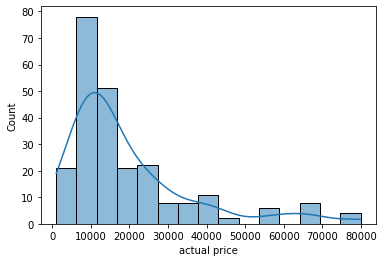

In [13]:
sns.histplot(df['actual price'],kde = True) #plotting histogram for actual price column to detect outliers

In [42]:
df.head()

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new,company
0,"APPLE iPhone 14 (Blue, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
1,"APPLE iPhone 14 (Starlight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
2,"REDMI 12 (Pastel Blue, 128 GB)",14999,9499,4.3,3108,54368,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,REDMI
3,"APPLE iPhone 14 (Midnight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
4,"APPLE iPhone 14 (Purple, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE


# Data analysis

In [14]:
#top selling product in flipkart
top_product = df['item name'][df['ratings count'] == max(df['ratings count'])]
top_product

208    SAMSUNG Guru Music 2
211    SAMSUNG Guru Music 2
Name: item name, dtype: object

In [15]:
grouped = df.groupby('company') #grouping by company name

In [16]:
grouped.get_group('APPLE')

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new,company
0,"APPLE iPhone 14 (Blue, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
1,"APPLE iPhone 14 (Starlight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
3,"APPLE iPhone 14 (Midnight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
4,"APPLE iPhone 14 (Purple, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
5,"APPLE iPhone 14 Plus (Blue, 128 GB)",79900,64999,4.6,2456,42080,128 GB ROM,APPLE
7,"APPLE iPhone 14 Plus (Purple, 128 GB)",79900,64999,4.6,2456,42080,128 GB ROM,APPLE
10,"APPLE iPhone 14 Plus (Starlight, 128 GB)",79900,64999,4.6,2456,42080,128 GB ROM,APPLE
11,"APPLE iPhone 14 Plus (Midnight, 128 GB)",79900,64999,4.6,2456,42080,128 GB ROM,APPLE
51,"APPLE iPhone 14 ((PRODUCT)RED, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
66,"APPLE iPhone 12 (White, 128 GB)",54900,44999,4.6,13374,201168,128 GB ROM,APPLE


In [18]:
#top rated companies
top_companies = grouped['ratings count'].sum()
top_companies #calculating total ratings of individual company mobiles

company
APPLE       3301498
Google        64457
Infinix     1323408
MOTOROLA     845898
MarQ           5934
Nokia        259175
Nothing        9912
OPPO          55970
OnePlus      460175
POCO        1404607
REDMI        571561
SAMSUNG     1693194
Samsung      104633
realme      1156150
vivo        1098628
Name: ratings count, dtype: int64

C:\Users\nutha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'ratings count(in million)')]

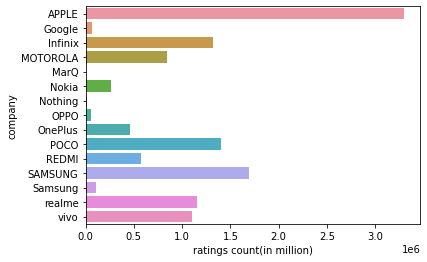

In [21]:
fig = sns.barplot(top_companies.values,top_companies.index)
fig.set(xlabel = 'ratings count(in million)')
#Apple has higher number of ratings i.e higher number of sales on flipkart

In [31]:
df['mrp'].corr(df['actual price']) #correlation values in high so mrp and actual price are strongly correlated

0.9734668985929341

Text(0, 0.5, 'actual price')

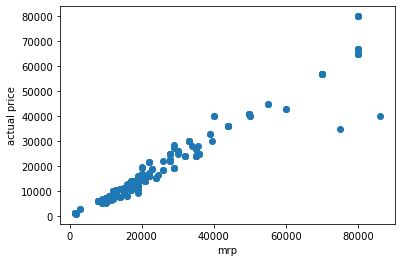

In [37]:
#relation between mrp and actual price
plt.scatter(df['mrp'],df['actual price'])
plt.xlabel('mrp')
plt.ylabel('actual price')
#it is seen that for some products of higher mrp price, there is lower actual price.
#we can observe that there is less number of sales for that product.

In [46]:
greater_variation_companies = df['company'][(df['mrp'] - df['actual price']) > 20000] #getting companies which has price difference more than 

In [48]:
greater_variation_companies #it is seen that samsung has lower number of sales than that of other products since difference of mrp and actual price is higher

148    SAMSUNG
209    Samsung
Name: company, dtype: object

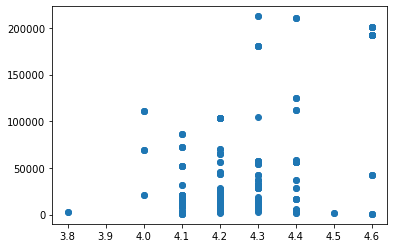

In [54]:
plt.scatter(df['item rating'],df['ratings count']) #plotting rating vs rating count using scatter plot

In [57]:
grouped_by_ram = df.groupby('ram_info_new') #grouping data by ram info

In [103]:
df_top_purchased = pd.DataFrame(grouped_by_ram['ratings count'].sum()) #converting grouped data into data frame

In [105]:
df_top_purchased.sort_values('ratings count',ascending = False)
# by specifications there are more ratings 
#i.e there are more sales of mobiles which has 128 GB ROM(Apple),6GB and 8GB RAM mobiles i.e android"

,ratings count
ram_info_new,
128 GB ROM,1727934
4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,1278146
6 GB RAM | 128 GB ROM,1188160
8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,924445
4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,903165
8 GB RAM | 256 GB ROM,890480
64 GB ROM,804672
256 GB ROM,768892
6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,634393


In [111]:
most_products_listed = df['company'].value_counts()

In [114]:
most_products_listed 
#most product listed for mobiles in flipkart is POCO which is leading mobile manufacturing company

POCO        33
MOTOROLA    31
realme      31
Infinix     30
REDMI       27
APPLE       24
SAMSUNG     24
vivo        11
OnePlus     10
Google       7
Nokia        5
Nothing      2
MarQ         2
OPPO         2
Samsung      1
Name: company, dtype: int64

In [3]:
df.head()

,item name,mrp,actual price,item rating,reviews count,ratings count,ram_info_new,company
0,"APPLE iPhone 14 (Blue, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
1,"APPLE iPhone 14 (Starlight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
2,"REDMI 12 (Pastel Blue, 128 GB)",14999,9499,4.3,3108,54368,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,REDMI
3,"APPLE iPhone 14 (Midnight, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE
4,"APPLE iPhone 14 (Purple, 128 GB)",69900,56999,4.6,7199,192223,128 GB ROM,APPLE


In [4]:
price_grouped = df.groupby('company') #grouping data by company

In [39]:
df_maxprice = pd.DataFrame(price_grouped['actual price'].max()) #getting maximum price of mobile by every company mobile listed

In [40]:
df['company'][df['actual price'] == max(df['actual price'])]

105    APPLE
165    APPLE
176    APPLE
203    APPLE
Name: company, dtype: object

In [41]:
df_maxprice = df_maxprice.sort_values('actual price',ascending = False) #sorting values by descending

In [42]:
df_maxprice

,actual price
company,
APPLE,79900
Google,42999
Nothing,39999
SAMSUNG,39999
vivo,39999
Samsung,34999
OPPO,32999
realme,29999
OnePlus,28530


C:\Users\nutha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual price', ylabel='company'>

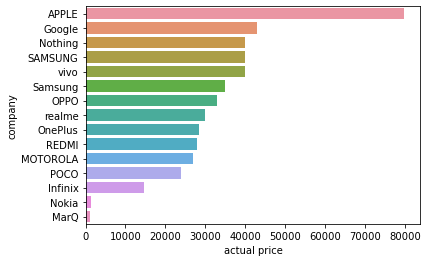

In [58]:
import seaborn as sns
sns.barplot(df_maxprice['actual price'],df_maxprice.index)
#we can observe that apple sells most expensive products on flipkart

Text(0, 0.5, 'Product Rating')

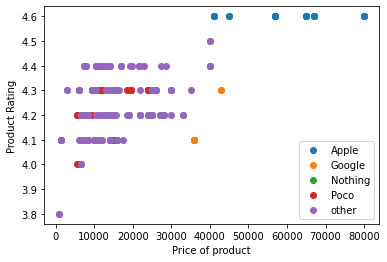

In [74]:
x_others = df['actual price'][(df['company'] != 'APPLE') & (df['company'] != 'Google') & (df['company'] != 'Nothing') & (df['company'] != 'POCO') ]
y_others = df['item rating'][(df['company'] != 'APPLE') & (df['company'] != 'Google') & (df['company'] != 'Nothing') & (df['company'] != 'POCO') ]
plt.scatter(df['actual price'][df['company'] == 'APPLE'],df['item rating'][df['company'] == 'APPLE'],label = 'Apple')
plt.scatter(df['actual price'][df['company'] == 'Google'],df['item rating'][df['company'] == 'Google'],label = 'Google')
plt.scatter(df['actual price'][df['company'] == 'Nothing'],df['item rating'][df['company'] == 'Nothing'],label = 'Nothing')
plt.scatter(df['actual price'][df['company'] == 'POCO'],df['item rating'][df['company'] == 'POCO'],label = 'Poco')
plt.scatter(x_others,y_others,label = 'other')
plt.legend()
plt.xlabel('Price of product')
plt.ylabel('Product Rating') #plotting scatter plot of price of every product of company vs product rating

In [76]:
df['item rating'].corr(df['actual price'])
#by correlation value we can observe that item rating is strongly dependent on price i.e rating increases as price increases

0.7048893818928018

## - we can conclude that apple and poco are emerging products selling on flipkart.
## - apple mobiles are the most expensive mobiles on flipkart.
## - most of the customer prefers 6GB and 8GB RAM mobiles which has more reasonable price.
## - sales can be increased by selling mobiles which has 6GB or 8GB RAM as well as for a reasonable price.
